## 模拟实现梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plot_x = np.linspace(-1, 6, 141)
plot_y = (plot_x - 2.5)**2 - 1

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


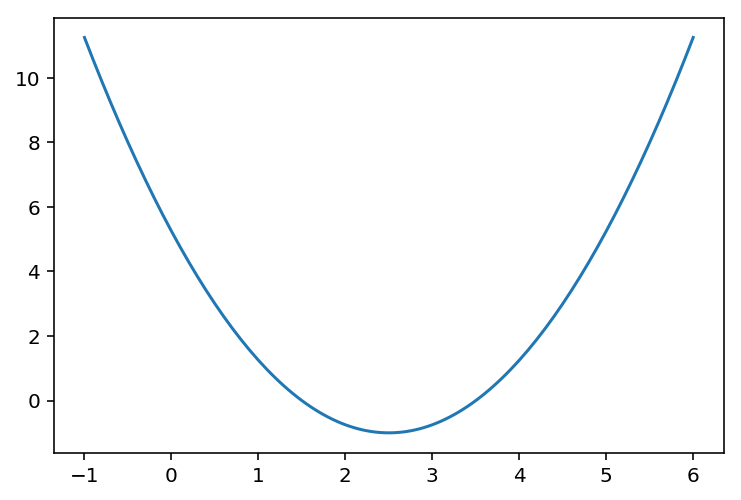

In [2]:
plt.plot(plot_x, plot_y)
plt.show()

### 定义目标函数

$$
y = (x - 2.5)^2 - 1
$$

In [3]:
def J(theta):
    return (theta - 2.5)**2 - 1

### 目标函数的梯度函数

$$
y = 2(x - 2.5)
$$

In [4]:
def dJ(theta):
    return 2 * (theta - 2.5)

In [5]:
eta = 0.1  # 学习率
epsilon = 1e-8

theta = 0.0  # 初始点
while True:
    # 计算当前的梯度
    gradient = dJ(theta)
    # 把当前变量的值存一下
    last_theta = theta
    # 通过梯度下降计算新的 theta
    theta = theta - eta * gradient
    # 如果函数值变化很小，则迭代可以停止
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


我们将 `theta` 的变化过程记录下来。

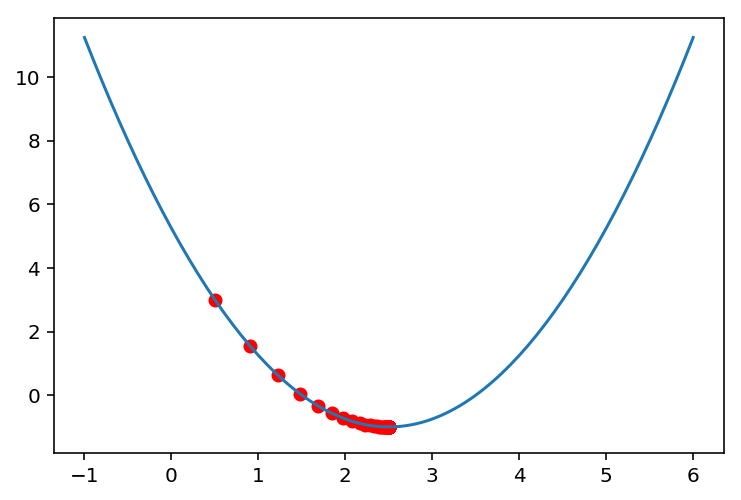

In [6]:
eta = 0.1  # 学习率
epsilon = 1e-8
theta_history = []

theta = 0.0  # 初始点
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break

# 绘制原始数据
plt.plot(plot_x, plot_y)
# 绘制 theta 值的变化
plt.scatter(np.array(theta_history), J(np.array(theta_history)), color='r')
plt.show()

In [7]:
len(theta_history)

45

## 封装梯度下降法

In [8]:
def gradient_descent(initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    """
    :param initial_theta: 变量的初始值
    :param eta: 学习率
    :param n_iters: 最大迭代次数
    :param epsilon: 函数值变化的阈值，如果小于这个阈值，迭代停止
    :return: 
    """
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0

    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        if (abs(J(theta) - J(last_theta)) < epsilon):
            break
        i_iter += 1


def plot_theta_history():
    """
    绘制变量的变化
    :return: 
    """
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r')
    plt.show()

### 将学习率减少一点

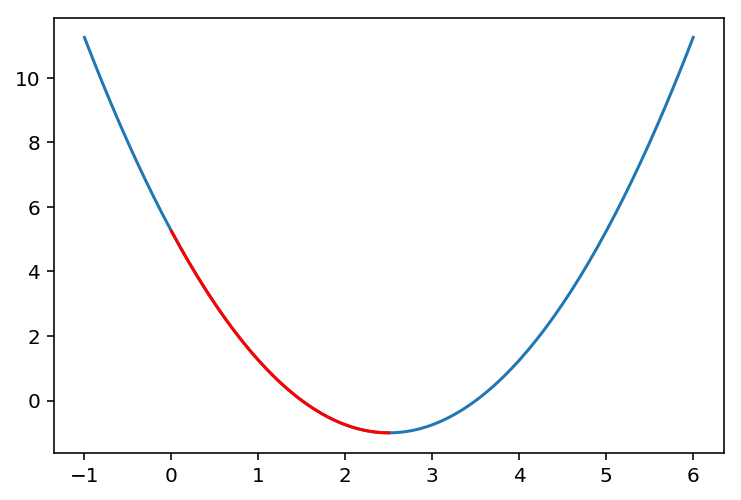

In [9]:
eta = 0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [10]:
len(theta_history)

424

减小学习率

### 将学习率再减少一点

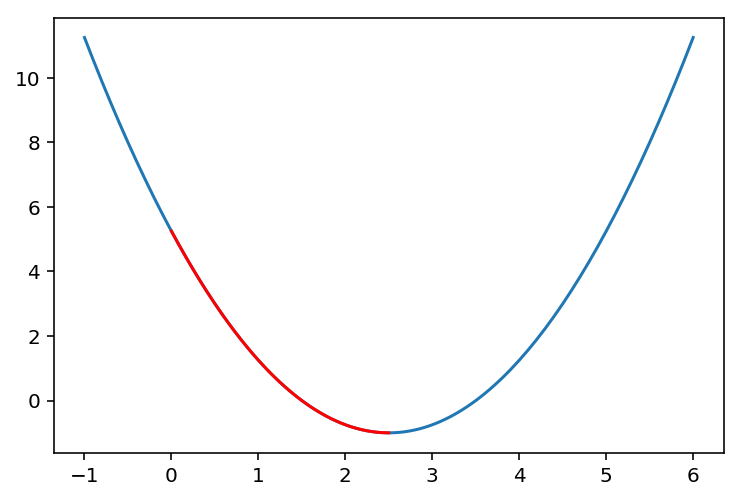

In [11]:
eta = 0.001
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [12]:
len(theta_history)

3682

### 增加学习率，发现搜索的过程发生震荡

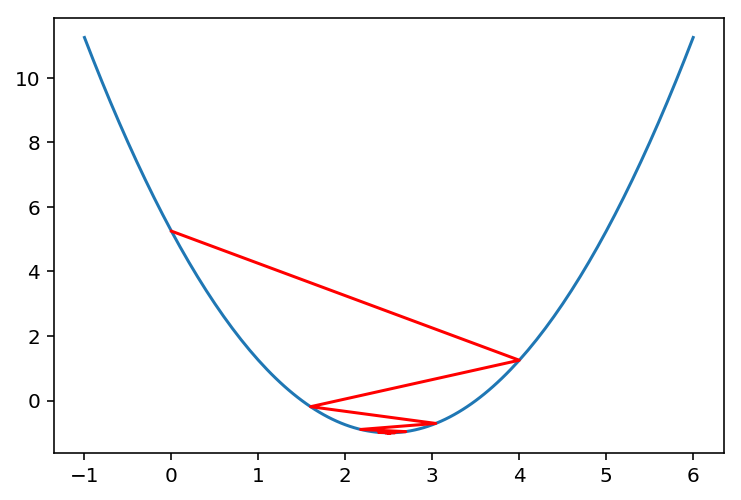

In [13]:
eta = 0.8
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

### 学习率增加，发现搜索“爆炸”了

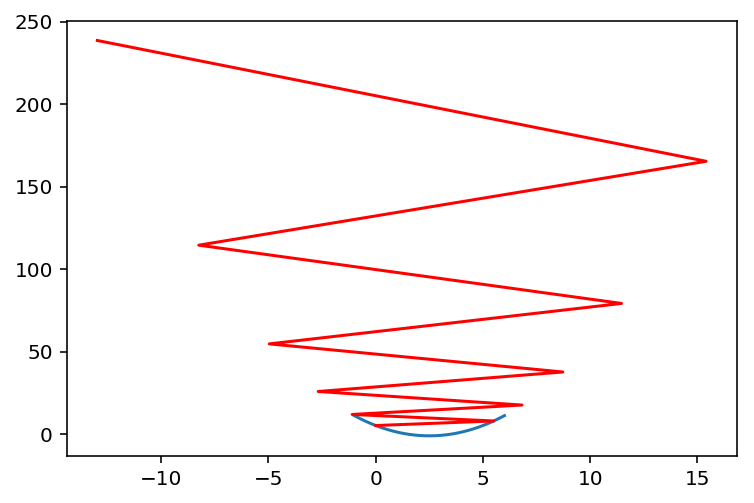

In [14]:
eta = 1.1
theta_history = []
gradient_descent(0., eta, n_iters=10)
plot_theta_history()